# Семинар 5. Практика. Композиции алгоритмов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Случайные леса

### Разделяющие поверхности

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


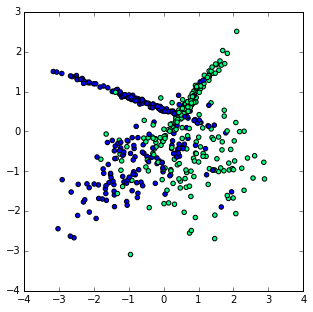

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

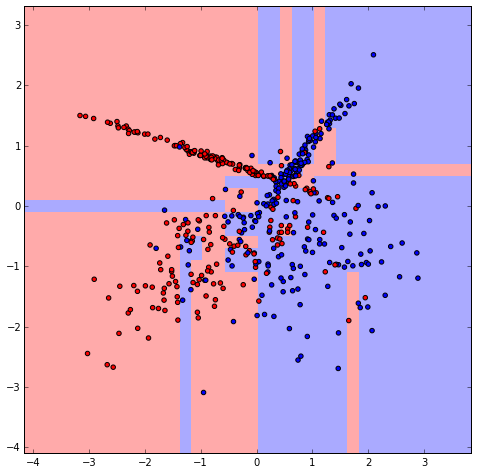

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1)
clf.fit(X, y)
plot_surface(X, y, clf)

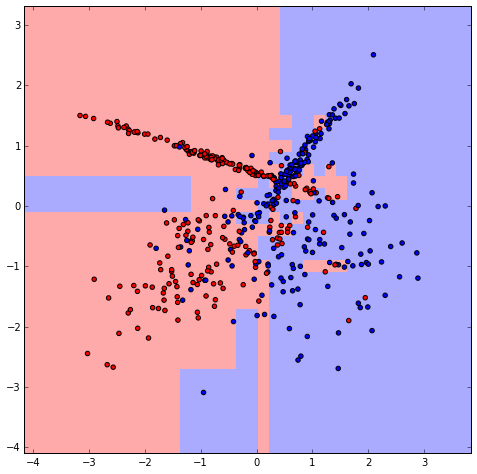

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)
plot_surface(X, y, clf)

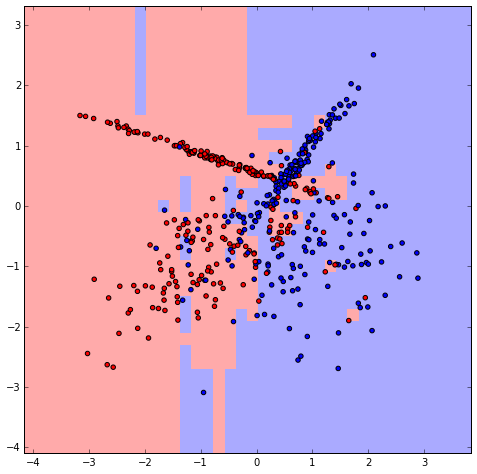

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
plot_surface(X, y, clf)

### Зависимость от глубины

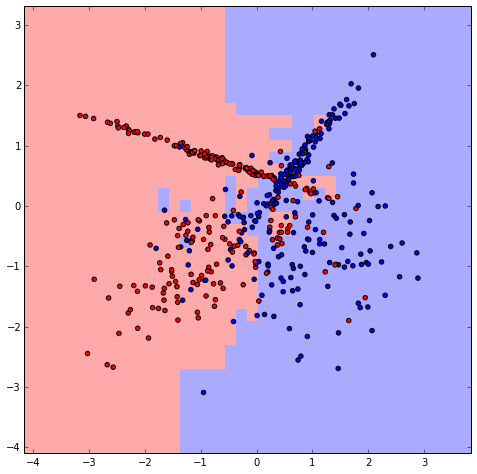

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8)
clf.fit(X, y)
plot_surface(X, y, clf)

### График ошибки

In [9]:
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=10, n_redundant=2, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, 
                           flip_y=0.05, class_sep=0.8, random_state=241)

In [10]:
?make_classification

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)

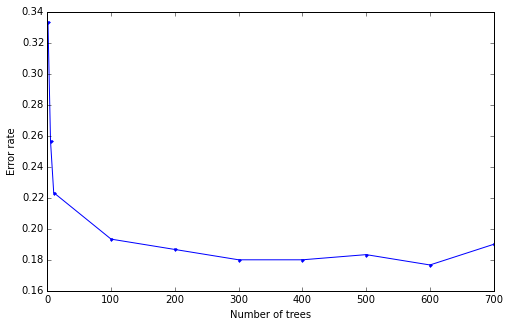

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)
depth = range(1, 30)
quals = []
for d in depth:
    clf = RandomForestClassifier(n_estimators=100, max_depth=d)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)

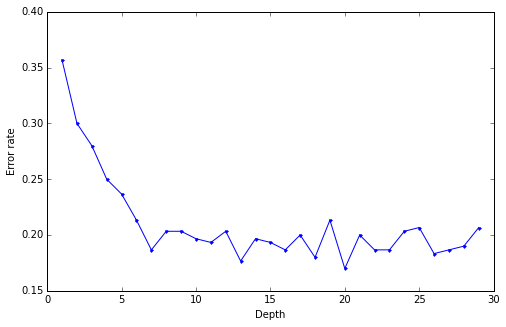

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(depth, quals, marker='.')
plt.xlabel('Depth')
plt.ylabel('Error rate')
plt.show()

In [15]:
?RandomForestClassifier

## Градиентный бустинг

In [16]:
import xgboost as xgb

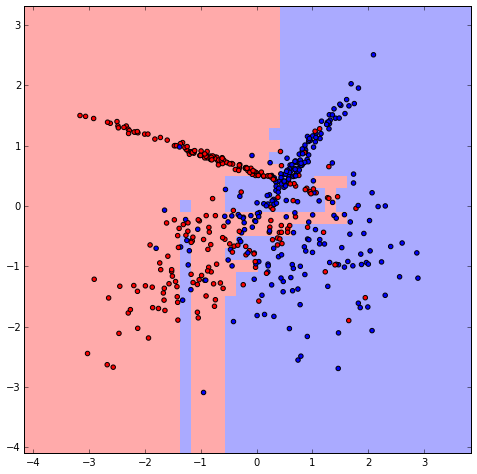

In [17]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)
clf = xgb.XGBClassifier()
clf.fit(X, y)
plot_surface(X, y, clf)

In [18]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=20, n_redundant=2, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, flip_y=0.05, class_sep=0.8, random_state=241)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)

In [19]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
print 1 - accuracy_score(y_test, clf.predict(X_test))

0.296666666667


In [20]:
?xgb.XGBClassifier

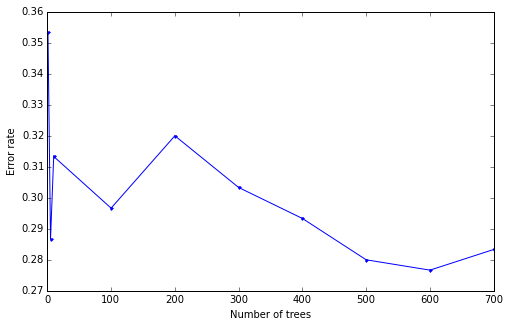

In [21]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=3)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

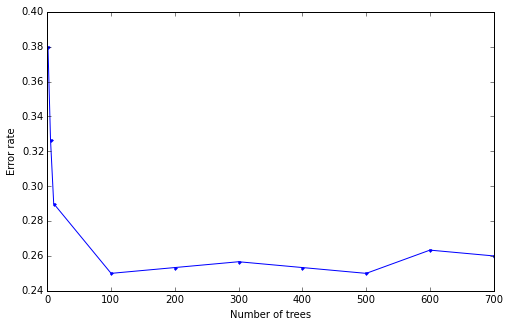

In [22]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=6)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

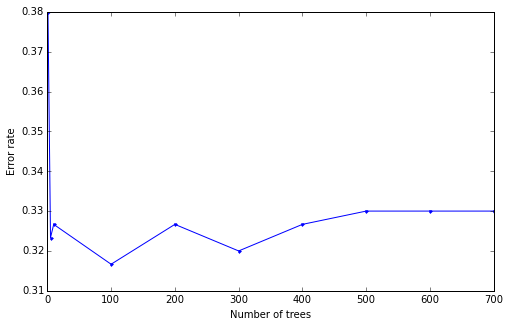

In [23]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=6, learning_rate=1)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

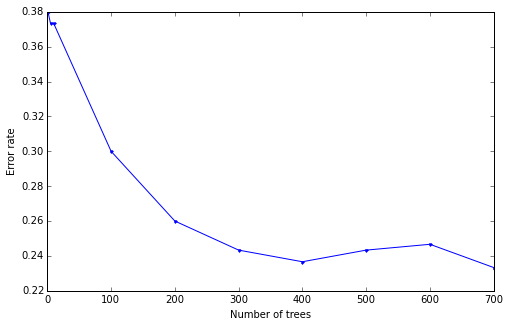

In [24]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=6,
                            learning_rate=0.01)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

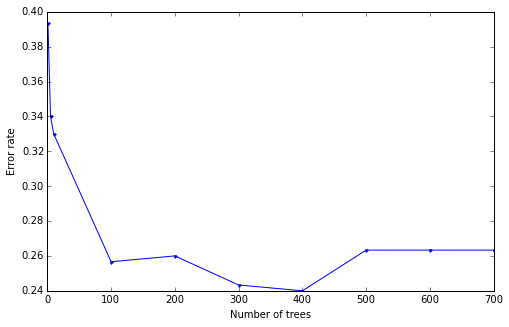

In [25]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=10)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

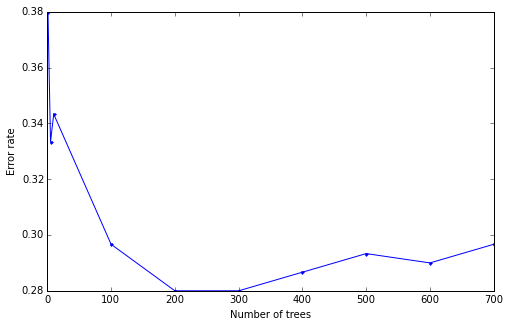

In [26]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=6, learning_rate=0.5)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

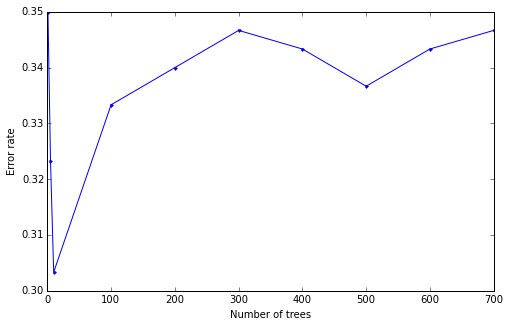

In [27]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=6,
                            learning_rate=0.5, reg_lambda=0)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Error rate')
plt.show()

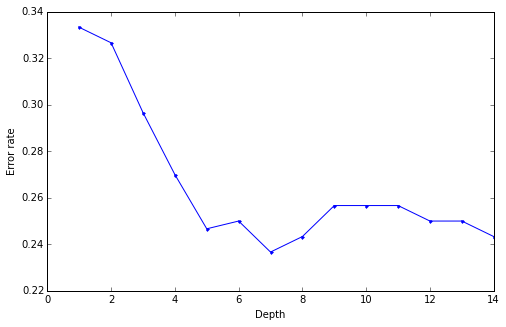

In [28]:
depth = range(1, 15)
quals = []
for d in depth:
    clf = xgb.XGBClassifier(n_estimators=100, max_depth=d)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)

plt.figure(figsize=(8, 5))
plt.plot(depth, quals, marker='.')
plt.xlabel('Depth')
plt.ylabel('Error rate')
plt.show()

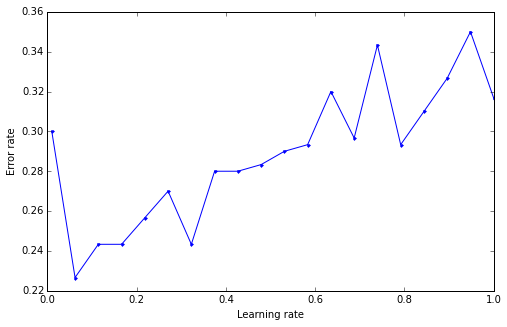

In [29]:
lr_all = np.linspace(0.01, 1.0, 20)
quals = []
for lr in lr_all:
    clf = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=lr)
    clf.fit(X_train, y_train)
    q = 1 - accuracy_score(y_test, clf.predict(X_test))
    quals.append(q)

plt.figure(figsize=(8, 5))
plt.plot(lr_all, quals, marker='.')
plt.xlabel('Learning rate')
plt.ylabel('Error rate')
plt.show()

### Реальные данные

In [30]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data.shape

(3751, 1777)

In [32]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

In [33]:
from sklearn.cross_validation import ShuffleSplit, cross_val_score
cv = ShuffleSplit(y.size, n_iter=1, test_size=0.3)

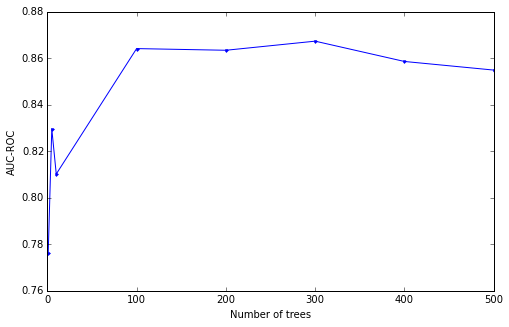

In [34]:
from sklearn.metrics import roc_auc_score
n_trees = [1, 5, 10, 100, 200, 300, 400, 500]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=3, learning_rate=0.1)
    q = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv)
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.show()

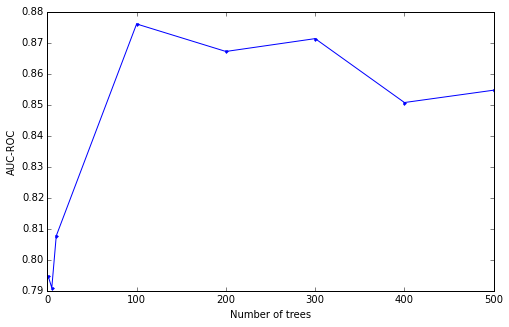

In [35]:
from sklearn.metrics import roc_auc_score
n_trees = [1, 5, 10, 100, 200, 300, 400, 500]
quals = []
for n in n_trees:
    clf = xgb.XGBClassifier(n_estimators=n, max_depth=3, learning_rate=0.1, reg_lambda=0)
    q = cross_val_score(clf, X, y, scoring='roc_auc', cv=cv)
    quals.append(q)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.show()

In [36]:
from sklearn.grid_search import GridSearchCV
grid = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [2, 4, 6]}
gs = GridSearchCV(xgb.XGBClassifier(), grid, scoring='roc_auc', cv=cv, n_jobs=2)
gs.fit(X, y)

GridSearchCV(cv=ShuffleSplit(3751, n_iter=1, test_size=0.3, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [37]:
for a in gs.grid_scores_:
    print a.parameters, a.mean_validation_score

{'n_estimators': 10, 'learning_rate': 0.01, 'max_depth': 2} 0.772645990055
{'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 2} 0.788418842455
{'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 2} 0.780726440314
{'n_estimators': 10, 'learning_rate': 0.01, 'max_depth': 4} 0.814116748244
{'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 4} 0.815513174913
{'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 4} 0.828190470728
{'n_estimators': 10, 'learning_rate': 0.01, 'max_depth': 6} 0.81447890697
{'n_estimators': 50, 'learning_rate': 0.01, 'max_depth': 6} 0.813809437056
{'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 6} 0.837361506502
{'n_estimators': 10, 'learning_rate': 0.1, 'max_depth': 2} 0.802402555098
{'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 2} 0.824926770815
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 2} 0.839138984146
{'n_estimators': 10, 'learning_rate': 0.1, 'max_depth': 4} 0.82633746291
{'n_estimators': 50, 'learn